# Analyze and Vizualize by concatenating data

To go deeper in the analysis of Google data, we can use concatenation to bind two different data sources.

In [5]:
import subprocess
import sqlite3
import pandas as pd
import seaborn as sns
import datetime
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'

## Location History and Google Activity

We are going to use the database you made in the `Google Takeout Location data` notebook.

In [6]:
# connect to the excavated file
connection = sqlite3.connect('GoogleLocationHistory.db')

# load the data as a pandas object
df_location = pd.read_sql_query("SELECT * FROM google_location_history", connection)

# examine the data
df_location

,id,source,activity,address,place_name,timestamp_msec,accuracy,verticalaccuracy,altitude,lat,lng
0,1,location_history,STILL,None,None,1621352204241,20.00000,0.0,0.0,47.768200,-3.117894
1,2,location_history,na,None,None,1621352224618,20.00000,0.0,0.0,47.768201,-3.117894
2,3,location_history,na,None,None,1621352240000,66.00000,0.0,0.0,47.768220,-3.117908
3,4,location_history,na,None,None,1621352245000,48.00000,0.0,0.0,47.768347,-3.118073
4,5,location_history,na,None,None,1621352246000,46.00000,0.0,0.0,47.768364,-3.118109
...,...,...,...,...,...,...,...,...,...,...,...
112131,112132,place_visit,None,"2 Allée de l'isara, 95000 Cergy, France",2 All. de l'isara,1641746158693,69.78562,NaN,NaN,49.032883,2.066607
112132,112133,place_visit,None,Rue De La Croix Des Maheux 95003\n95000 Cergy\...,Centre Commercial Les 3 Fontaines,1641805999016,89.49450,NaN,NaN,49.038273,2.081293
112133,112134,place_visit,None,"2 Allée de l'isara, 95000 Cergy, France",2 All. de l'isara,1641808846564,64.86925,NaN,NaN,49.032883,2.066607
112134,112135,place_visit,None,2 Rue des Chênes Pourpres\n95800 Cergy\nFrance,Basic-Fit Cergy Rue des Chênes Pourpres,1641810947860,89.42763,NaN,NaN,49.040835,2.073765


Download your Google Activity `My Activity` in the [Google Takeout Service](https://takeout.google.com/settings/takeout). Make sure that the format for `Activity Records` is `JSON` instead of HTML.

The following command may take some time (depending on how many records you have).

Replace `PATH_TO_YOUR_FILE` by the path to your `My Activity` folder.

In [7]:
command = ["excavator", "read", "h:/Desktop/My Activity", "--dbfile", "GoogleSearchHistory.db"]

subprocess.call(command)

1

In [8]:
# connect to the excavated file
connection = sqlite3.connect('GoogleSearchHistory.db')

# load the data as a pandas object
df_activity = pd.read_sql_query("SELECT * FROM google_my_activity", connection)

# examine the data
df_activity

,uuid,header,title,title_url,time
0,0c612501-0ada-49df-8a59-011d0c298072,"Foot Mercato : transferts, résultats, news, live","Used Foot Mercato : transferts, résultats, new...",https://play.google.com/store/apps/details?id=...,2022-02-20T11:07:00.695Z
1,0cb29b56-d2bf-4f53-96dd-e3bdbcde162a,Spotify: Music and Podcasts - Apps on Google Play,Used Spotify: Music and Podcasts - Apps on Goo...,https://play.google.com/store/apps/details?id=...,2022-02-20T10:18:39.588Z
2,b6cd4a9d-7759-47a7-b7f8-6ed711711a95,usa-suits.livejournal.com,Visited https://usa-suits.livejournal.com/9765...,https://www.google.com/url?q=https://usa-suits...,2022-02-20T00:10:24.215Z
3,20856ba9-3027-453b-8051-808fde10784d,"Foot Mercato : transferts, résultats, news, live","Used Foot Mercato : transferts, résultats, new...",https://play.google.com/store/apps/details?id=...,2022-02-19T23:24:09.023Z
4,ef23f4bf-9071-44e6-8675-b7a011bde216,"Foot Mercato : transferts, résultats, news, live","Used Foot Mercato : transferts, résultats, new...",https://play.google.com/store/apps/details?id=...,2022-02-19T22:41:57.320Z
...,...,...,...,...,...
70044,1f7e5326-d72b-4999-9f67-f7365a20865b,Image Search,Searched for vieux mac,https://www.google.com/search?q=vieux+mac&tbm=...,2015-05-16T10:38:58.052Z
70045,819db1e3-9782-4c04-b0c5-b9537b2e72fc,Image Search,Searched for mac,https://www.google.com/search?q=mac&tbm=isch,2015-05-16T10:38:42.337Z
70046,8fc2cc83-6226-431d-aa84-982ddbe827d7,Image Search,Searched for portable amazon,https://www.google.com/search?q=portable+amazo...,2015-05-16T10:36:51.583Z
70047,4c3cf1aa-28a8-4c7b-9059-b6f8e80876fb,Image Search,Searched for portableamazon,https://www.google.com/search?q=portableamazon...,2015-05-16T10:35:34.757Z


Let's clean a bit our data

In [9]:
df_location = df_location[['address','place_name','timestamp_msec','lat','lng']]
df_activity = df_activity[['header','title','time']]

df_location['timestamp_msec'] = pd.to_datetime(df_location['timestamp_msec'], unit='ms').dt.tz_localize(tz='CET', ambiguous=True) #Change tz value
df_location.rename(columns={'timestamp_msec':'datetime'}, inplace=True)


***Note***: Change the value `tz='CET'` by your own timezone.

In [10]:
df_location

,address,place_name,datetime,lat,lng
0,None,None,2021-05-18 15:36:44.241000+02:00,47.768200,-3.117894
1,None,None,2021-05-18 15:37:04.618000+02:00,47.768201,-3.117894
2,None,None,2021-05-18 15:37:20+02:00,47.768220,-3.117908
3,None,None,2021-05-18 15:37:25+02:00,47.768347,-3.118073
4,None,None,2021-05-18 15:37:26+02:00,47.768364,-3.118109
...,...,...,...,...,...
112131,"2 Allée de l'isara, 95000 Cergy, France",2 All. de l'isara,2022-01-09 16:35:58.693000+01:00,49.032883,2.066607
112132,Rue De La Croix Des Maheux 95003\n95000 Cergy\...,Centre Commercial Les 3 Fontaines,2022-01-10 09:13:19.016000+01:00,49.038273,2.081293
112133,"2 Allée de l'isara, 95000 Cergy, France",2 All. de l'isara,2022-01-10 10:00:46.564000+01:00,49.032883,2.066607
112134,2 Rue des Chênes Pourpres\n95800 Cergy\nFrance,Basic-Fit Cergy Rue des Chênes Pourpres,2022-01-10 10:35:47.860000+01:00,49.040835,2.073765


We want to concatenate both dataframes with the `datetime` as common point. 

**We need to make some arrangements to fit both time formats.**

***Note***: Change the value `tz_convert('Europe/Berlin')` by your own timezone.

In [11]:
df_activity['time'] = df_activity['time'].apply(pd.to_datetime).dt.tz_convert('Europe/Berlin')
df_activity

,header,title,time
0,"Foot Mercato : transferts, résultats, news, live","Used Foot Mercato : transferts, résultats, new...",2022-02-20 12:07:00.695000+01:00
1,Spotify: Music and Podcasts - Apps on Google Play,Used Spotify: Music and Podcasts - Apps on Goo...,2022-02-20 11:18:39.588000+01:00
2,usa-suits.livejournal.com,Visited https://usa-suits.livejournal.com/9765...,2022-02-20 01:10:24.215000+01:00
3,"Foot Mercato : transferts, résultats, news, live","Used Foot Mercato : transferts, résultats, new...",2022-02-20 00:24:09.023000+01:00
4,"Foot Mercato : transferts, résultats, news, live","Used Foot Mercato : transferts, résultats, new...",2022-02-19 23:41:57.320000+01:00
...,...,...,...
70044,Image Search,Searched for vieux mac,2015-05-16 12:38:58.052000+02:00
70045,Image Search,Searched for mac,2015-05-16 12:38:42.337000+02:00
70046,Image Search,Searched for portable amazon,2015-05-16 12:36:51.583000+02:00
70047,Image Search,Searched for portableamazon,2015-05-16 12:35:34.757000+02:00


Now that both formats are the same, we are going to concatenate both dataframes, by considering only records that have common datetimes. To be more efficient, we filter only comparing **`DAY/HOUR/MINUTE`** without seconds.

In [12]:
df_activity['time'] = df_activity['time'].apply(lambda x: x.replace(second=0, microsecond=0))
df_location['datetime'] = df_location['datetime'].apply(lambda x: x.replace(second=0, microsecond=0))

In [13]:
df_activity

,header,title,time
0,"Foot Mercato : transferts, résultats, news, live","Used Foot Mercato : transferts, résultats, new...",2022-02-20 12:07:00+01:00
1,Spotify: Music and Podcasts - Apps on Google Play,Used Spotify: Music and Podcasts - Apps on Goo...,2022-02-20 11:18:00+01:00
2,usa-suits.livejournal.com,Visited https://usa-suits.livejournal.com/9765...,2022-02-20 01:10:00+01:00
3,"Foot Mercato : transferts, résultats, news, live","Used Foot Mercato : transferts, résultats, new...",2022-02-20 00:24:00+01:00
4,"Foot Mercato : transferts, résultats, news, live","Used Foot Mercato : transferts, résultats, new...",2022-02-19 23:41:00+01:00
...,...,...,...
70044,Image Search,Searched for vieux mac,2015-05-16 12:38:00+02:00
70045,Image Search,Searched for mac,2015-05-16 12:38:00+02:00
70046,Image Search,Searched for portable amazon,2015-05-16 12:36:00+02:00
70047,Image Search,Searched for portableamazon,2015-05-16 12:35:00+02:00


In [14]:
df_location

,address,place_name,datetime,lat,lng
0,None,None,2021-05-18 15:36:00+02:00,47.768200,-3.117894
1,None,None,2021-05-18 15:37:00+02:00,47.768201,-3.117894
2,None,None,2021-05-18 15:37:00+02:00,47.768220,-3.117908
3,None,None,2021-05-18 15:37:00+02:00,47.768347,-3.118073
4,None,None,2021-05-18 15:37:00+02:00,47.768364,-3.118109
...,...,...,...,...,...
112131,"2 Allée de l'isara, 95000 Cergy, France",2 All. de l'isara,2022-01-09 16:35:00+01:00,49.032883,2.066607
112132,Rue De La Croix Des Maheux 95003\n95000 Cergy\...,Centre Commercial Les 3 Fontaines,2022-01-10 09:13:00+01:00,49.038273,2.081293
112133,"2 Allée de l'isara, 95000 Cergy, France",2 All. de l'isara,2022-01-10 10:00:00+01:00,49.032883,2.066607
112134,2 Rue des Chênes Pourpres\n95800 Cergy\nFrance,Basic-Fit Cergy Rue des Chênes Pourpres,2022-01-10 10:35:00+01:00,49.040835,2.073765


Great! We can finally concatenate the dataframes! 

For doing this, we make an `Inner Join`.

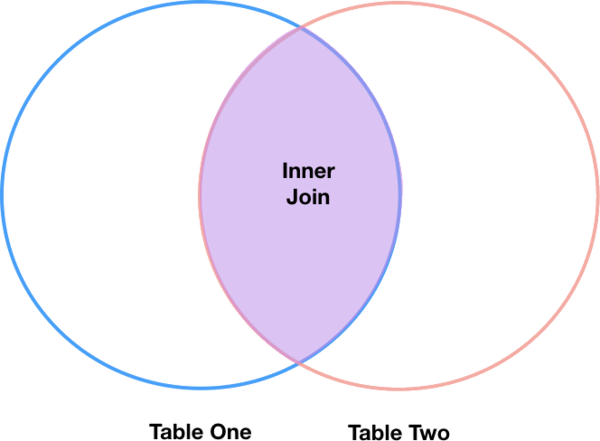


In [15]:
merged_inner = pd.merge(left=df_location, right=df_activity, left_on='datetime', right_on='time')
merged_inner

,address,place_name,datetime,lat,lng,header,title,time
0,None,None,2021-05-18 15:38:00+02:00,47.768245,-3.117858,"Discord - Chat, Talk & Hangout","Used Discord - Chat, Talk & Hangout",2021-05-18 15:38:00+02:00
1,None,None,2021-05-18 15:38:00+02:00,47.768247,-3.117863,"Discord - Chat, Talk & Hangout","Used Discord - Chat, Talk & Hangout",2021-05-18 15:38:00+02:00
2,None,None,2021-05-18 15:38:00+02:00,47.768249,-3.117869,"Discord - Chat, Talk & Hangout","Used Discord - Chat, Talk & Hangout",2021-05-18 15:38:00+02:00
3,None,None,2021-05-18 15:38:00+02:00,47.768201,-3.117895,"Discord - Chat, Talk & Hangout","Used Discord - Chat, Talk & Hangout",2021-05-18 15:38:00+02:00
4,None,None,2021-05-18 15:39:00+02:00,47.768273,-3.117980,Permissions Controller,Used Permissions Controller,2021-05-18 15:39:00+02:00
...,...,...,...,...,...,...,...,...
18270,France,Parc naturel régional de la Haute Vallée de Ch...,2021-06-24 15:04:00+02:00,48.710492,2.040409,leboncoin.fr,Visited https://www.leboncoin.fr/locations/199...,2021-06-24 15:04:00+02:00
18271,France,Parc naturel régional de la Haute Vallée de Ch...,2021-06-24 15:04:00+02:00,48.710492,2.040409,mail.yahoo.com,Visited Yahoo Mail,2021-06-24 15:04:00+02:00
18272,78610 Le Perray-en-Yvelines\nFrance,Perray,2021-11-12 14:34:00+01:00,48.693178,1.856192,Tinder - Dating & Make Friends,Used Tinder - Dating & Make Friends,2021-11-12 14:34:00+01:00
18273,16 Rue Louis Bonnet\n75011 Paris\nFrance,Panda Belleville,2021-10-09 11:14:00+02:00,48.871389,2.376944,Instagram,Used Instagram,2021-10-09 11:14:00+02:00


We can notice that for each record **we have the same value** for `time` and `datetime` so it worked well! 

The number of records will depend on your own data. Of course, it also depends on **your choice of filtering time values**. Indeed, instead of filtering by minute, we could have done it by hour, or even by day... We could also round the minute value to a selected one: for example all the minutes between 36 and 40 could be set to 40, 41 and 45 set to 45...

#### Analysis

Now that we have bound `location` and `activity`, we can start analyzing our data.

We can make a heatmap using `Folium` like in the `location notebook` to see where do we use the most our smartphone, computer...

In [16]:
from folium import Map
from folium.plugins import HeatMap

for_map = Map(location=[48.856614, 2.3522219], zoom_start=8, )

hm_wide = HeatMap(
    list(zip(merged_inner.lat.values, merged_inner.lng.values)),
    min_opacity=0.2,
    radius=17, 
    blur=15, 
    max_zoom=1,
)

for_map.add_child(hm_wide)

Comparing it with the heatmap you obtained in the `Google Takeout Location data notebook` may be interesting. 

In our example, we can see that there is a lot more activity in `Chemin des Paradis` than in `CY Tech`. (Zoom on the Paris North-West) 

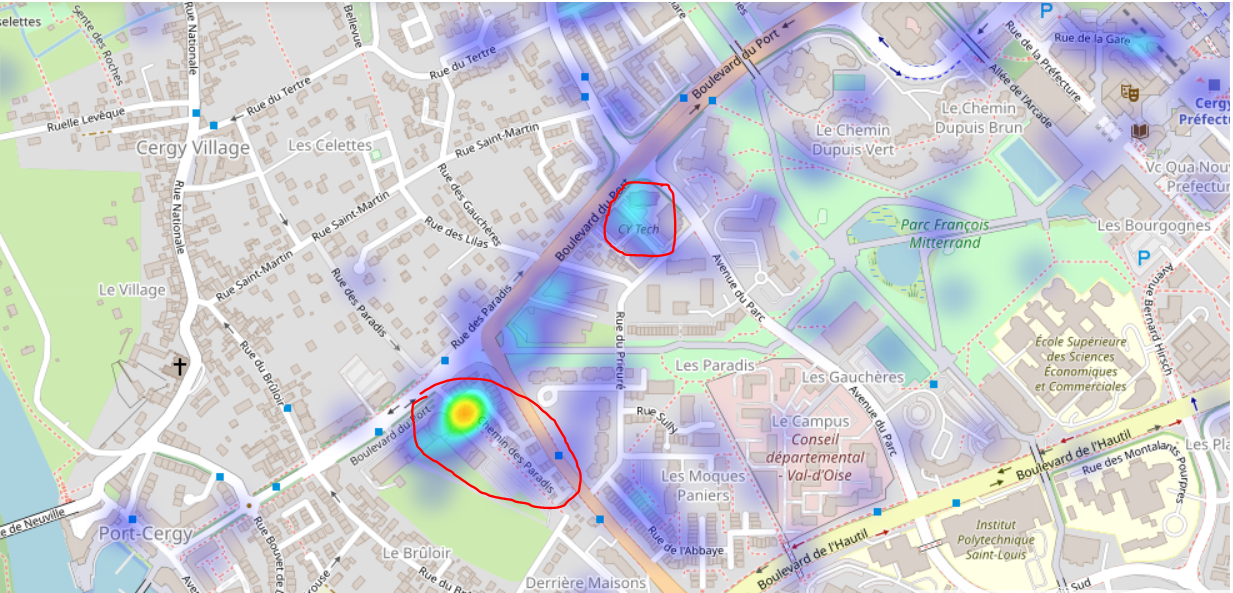

The student who kindly gave his data for this courses materials lives in `Chemin des Paradis` and studies in `CY Tech`. He is supposed to use less his phone/computer while studying at school, which is confirmed by our heatmap. A second explanation would be that he spends more time at home than at school, but as we saw in the `Google Takeout Location data notebook`, he leaves this home during week-ends, which drastically reduces his time spent at home. 

**We can also compare our activity depending on where we are**. 

In [17]:
import reverse_geocoder as rg

def reverseGeocode(coordinates):
    result = rg.search(coordinates)
    return result  
coordinates =list(zip(merged_inner['lat'],merged_inner['lng'])) # generates pair of (lat,long)
data = reverseGeocode(coordinates)
merged_inner['city'] = [i['name'] for i in data]
merged_inner['country'] = [i['cc'] for i in data]
merged_inner

Loading formatted geocoded file...


,address,place_name,datetime,lat,lng,header,title,time,city,country
0,None,None,2021-05-18 15:38:00+02:00,47.768245,-3.117858,"Discord - Chat, Talk & Hangout","Used Discord - Chat, Talk & Hangout",2021-05-18 15:38:00+02:00,Landevant,FR
1,None,None,2021-05-18 15:38:00+02:00,47.768247,-3.117863,"Discord - Chat, Talk & Hangout","Used Discord - Chat, Talk & Hangout",2021-05-18 15:38:00+02:00,Landevant,FR
2,None,None,2021-05-18 15:38:00+02:00,47.768249,-3.117869,"Discord - Chat, Talk & Hangout","Used Discord - Chat, Talk & Hangout",2021-05-18 15:38:00+02:00,Landevant,FR
3,None,None,2021-05-18 15:38:00+02:00,47.768201,-3.117895,"Discord - Chat, Talk & Hangout","Used Discord - Chat, Talk & Hangout",2021-05-18 15:38:00+02:00,Landevant,FR
4,None,None,2021-05-18 15:39:00+02:00,47.768273,-3.117980,Permissions Controller,Used Permissions Controller,2021-05-18 15:39:00+02:00,Landevant,FR
...,...,...,...,...,...,...,...,...,...,...
18270,France,Parc naturel régional de la Haute Vallée de Ch...,2021-06-24 15:04:00+02:00,48.710492,2.040409,leboncoin.fr,Visited https://www.leboncoin.fr/locations/199...,2021-06-24 15:04:00+02:00,Chevreuse,FR
18271,France,Parc naturel régional de la Haute Vallée de Ch...,2021-06-24 15:04:00+02:00,48.710492,2.040409,mail.yahoo.com,Visited Yahoo Mail,2021-06-24 15:04:00+02:00,Chevreuse,FR
18272,78610 Le Perray-en-Yvelines\nFrance,Perray,2021-11-12 14:34:00+01:00,48.693178,1.856192,Tinder - Dating & Make Friends,Used Tinder - Dating & Make Friends,2021-11-12 14:34:00+01:00,Le Perray-en-Yvelines,FR
18273,16 Rue Louis Bonnet\n75011 Paris\nFrance,Panda Belleville,2021-10-09 11:14:00+02:00,48.871389,2.376944,Instagram,Used Instagram,2021-10-09 11:14:00+02:00,Le Pre-Saint-Gervais,FR


<AxesSubplot:>

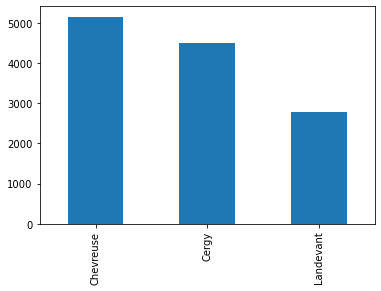

In [18]:
merged_inner['city'].value_counts().head(3).plot.bar()

Of course, we can not compare those numbers with the ones we had in the `Google Takeout Location data notebook` because we don't have the same numbers of records. However, we can compare the rates!

**RATE FOR THE CONCATENATION**

In [19]:
merged_inner['city'].value_counts(normalize=True) * 100

Chevreuse               28.218878
Cergy                   24.596443
Landevant               15.173735
Dijon                   11.086183
Les Essarts-le-Roi       6.298222
                          ...    
Saint-Usage              0.005472
Brazey-en-Plaine         0.005472
Pluneret                 0.005472
Hennebont                0.005472
La Celle-Saint-Cloud     0.005472
Name: city, Length: 201, dtype: float64

**RATE FOR THE LOCATION**

In [20]:
coordinates =list(zip(df_location['lat'],df_location['lng'])) # generates pair of (lat,long)
data = reverseGeocode(coordinates)
df_location['city'] = [i['name'] for i in data]
df_location['country'] = [i['cc'] for i in data]
df_location['city'].value_counts(normalize=True) * 100

Chevreuse             27.584362
Cergy                 22.006314
Landevant             16.521010
Dijon                 13.043982
Les Essarts-le-Roi     7.126168
                        ...    
Varennes-Jarcy         0.000892
Chaussin               0.000892
Montmorot              0.000892
Sartrouville           0.000892
Andresy                0.000892
Name: city, Length: 398, dtype: float64

In our case, we don't have really excessive differences between the time we spend in a city and the time we spend in this city using our smartphone, computer... However we can notice that the data donator maybe over-uses his devices in `Cergy` (22% of his time in Cergy for 24,6% of his activity in the city).

**CONCLUSION FOR THE LOCATION/ACTIVITY:** 

Comparing `Activity` and `Location` is really interesting, as it underlines some behaviors and paterns for individuals. In the same idea of the `Google Takeout Location data notebook`, with API like [Nominatim](https://nominatim.org/release-docs/latest/) or [Google Geocoding API](https://developers.google.com/maps/documentation/geocoding/start) we could even be more precise by having the exact address for each activities, and make distinctions into cities. For example, with our student's data, we could see exactly how much time does he spend on his devices at school versus at home.  

## Location History and Youtube Activity

Just like before, we are going to see where we are the most active on YouTube. For this part, we will use the dataframe `df_location` and we will need to connect to our `Youtube Watch History`.

In [31]:
path = "PATH_TO_YOUR_FILE"
df_watch_history = pd.read_json(path)

df_watch_history

,header,title,titleUrl,subtitles,time,products,activityControls,details
0,YouTube,Watched 🇫🇷 Comment peut-on encore miser sur Be...,https://www.youtube.com/watch?v=VtDH8SEUQdo,"[{'name': 'Talk My Football', 'url': 'https://...",2022-01-20T06:11:11.637Z,[YouTube],[YouTube watch history],NaN
1,YouTube,Watched Red Swan - Attack on Titan Season 3 OP...,https://www.youtube.com/watch?v=sWcgKts80vM,"[{'name': 'PianoDeuss', 'url': 'https://www.yo...",2022-01-19T23:59:32.366Z,[YouTube],[YouTube watch history],NaN
2,YouTube,"Watched [Attack on Titan Season 3 OP 1] ""Red S...",https://www.youtube.com/watch?v=NxGVE9mGwlo,"[{'name': 'Fonzi M - Melodies on Piano', 'url'...",2022-01-19T23:59:16.340Z,[YouTube],[YouTube watch history],NaN
3,YouTube,Watched L'Attaque des Titans (S3) EN 13 MINUTE...,https://www.youtube.com/watch?v=zWZbPDbn-6Q,"[{'name': 'Re: Take', 'url': 'https://www.yout...",2022-01-19T23:50:34.417Z,[YouTube],[YouTube watch history],NaN
4,YouTube,Watched Attack on Titan OST - Vogel im Käfig (...,https://www.youtube.com/watch?v=L8YIB2L6g3E,"[{'name': 'PianoDeuss', 'url': 'https://www.yo...",2022-01-19T23:15:38.027Z,[YouTube],[YouTube watch history],NaN
...,...,...,...,...,...,...,...,...
21635,YouTube,Watched Charli XCX - Break The Rules [Official...,https://www.youtube.com/watch?v=ABhDiXbUaBE,"[{'name': 'Charli XCX', 'url': 'https://www.yo...",2015-05-15T18:31:08.007Z,[YouTube],[YouTube watch history],NaN
21636,YouTube,Watched Charli XCX - Boom Clap (Lyrics Officia...,https://www.youtube.com/watch?v=ek1f0Sb7v70,"[{'name': 'xxChloexx', 'url': 'https://www.you...",2015-05-15T18:27:59.780Z,[YouTube],[YouTube watch history],NaN
21637,YouTube,Watched LYRICS - DJ Earworm Mashup - United St...,https://www.youtube.com/watch?v=B4a0bqOCJdY,"[{'name': 'Dj Earworm', 'url': 'https://www.yo...",2015-05-15T18:24:42.967Z,[YouTube],[YouTube watch history],NaN
21638,YouTube,Watched https://www.youtube.com/watch?v=LSZ915...,https://www.youtube.com/watch?v=LSZ915DfDmI,NaN,2015-05-15T18:22:45.762Z,[YouTube],[YouTube watch history],NaN


Replace `PATH_TO_YOUR_FILE` by the path where your YouTube `watch-history.json` is stored on your device. 

In [32]:
df_watch_history = df_watch_history.drop(['header','titleUrl','products','activityControls','details'], axis=1)
df_watch_history['time'] = df_watch_history['time'].apply(pd.to_datetime).dt.tz_convert('Europe/Berlin')
df_watch_history

,title,subtitles,time
0,Watched 🇫🇷 Comment peut-on encore miser sur Be...,"[{'name': 'Talk My Football', 'url': 'https://...",2022-01-20 07:11:11.637000+01:00
1,Watched Red Swan - Attack on Titan Season 3 OP...,"[{'name': 'PianoDeuss', 'url': 'https://www.yo...",2022-01-20 00:59:32.366000+01:00
2,"Watched [Attack on Titan Season 3 OP 1] ""Red S...","[{'name': 'Fonzi M - Melodies on Piano', 'url'...",2022-01-20 00:59:16.340000+01:00
3,Watched L'Attaque des Titans (S3) EN 13 MINUTE...,"[{'name': 'Re: Take', 'url': 'https://www.yout...",2022-01-20 00:50:34.417000+01:00
4,Watched Attack on Titan OST - Vogel im Käfig (...,"[{'name': 'PianoDeuss', 'url': 'https://www.yo...",2022-01-20 00:15:38.027000+01:00
...,...,...,...
21635,Watched Charli XCX - Break The Rules [Official...,"[{'name': 'Charli XCX', 'url': 'https://www.yo...",2015-05-15 20:31:08.007000+02:00
21636,Watched Charli XCX - Boom Clap (Lyrics Officia...,"[{'name': 'xxChloexx', 'url': 'https://www.you...",2015-05-15 20:27:59.780000+02:00
21637,Watched LYRICS - DJ Earworm Mashup - United St...,"[{'name': 'Dj Earworm', 'url': 'https://www.yo...",2015-05-15 20:24:42.967000+02:00
21638,Watched https://www.youtube.com/watch?v=LSZ915...,NaN,2015-05-15 20:22:45.762000+02:00


In [33]:
df_watch_history['time'] = df_watch_history['time'].apply(lambda x: x.replace(second=0, microsecond=0))
merged_inner_youtube = pd.merge(left=df_location, right=df_watch_history, left_on='datetime', right_on='time')
merged_inner_youtube

,address,place_name,datetime,lat,lng,city,country,ts_location,title,subtitles,time
0,None,None,2021-05-19 08:48:00+02:00,47.768201,-3.117872,Landevant,FR,1621406880,Watched DEVINER L'ANIME AVEC LA SCÈNE (QUIZ),"[{'name': 'MinOtaku', 'url': 'https://www.yout...",2021-05-19 08:48:00+02:00
1,None,None,2021-05-19 08:53:00+02:00,47.768204,-3.117874,Landevant,FR,1621407180,Watched Vie traditionnelle et maison Japonaise !,"[{'name': 'Guillaume Gimenez Photographe', 'ur...",2021-05-19 08:53:00+02:00
2,None,None,2021-05-19 09:00:00+02:00,47.768204,-3.117874,Landevant,FR,1621407600,Watched MISTER V - RAP VS REALITE 2,"[{'name': 'Mister V', 'url': 'https://www.yout...",2021-05-19 09:00:00+02:00
3,None,None,2021-05-19 09:00:00+02:00,47.768204,-3.117874,Landevant,FR,1621407600,Watched MISTER V - LA POLICE 2,"[{'name': 'Mister V', 'url': 'https://www.yout...",2021-05-19 09:00:00+02:00
4,None,None,2021-05-19 21:02:00+02:00,47.768200,-3.117869,Landevant,FR,1621450920,Watched C'était dur de prendre cette décision !,"[{'name': 'Ici Japon Corp.', 'url': 'https://w...",2021-05-19 21:02:00+02:00
...,...,...,...,...,...,...,...,...,...,...,...
1138,None,None,2022-01-09 20:20:00+01:00,49.032930,2.066637,Cergy,FR,1641756000,Watched https://www.youtube.com/watch?v=_tRuVg...,NaN,2022-01-09 20:20:00+01:00
1139,None,None,2022-01-09 23:21:00+01:00,49.032741,2.066439,Cergy,FR,1641766860,Watched New 6 Minute Pokemon Legends Arceus Ga...,"[{'name': 'Austin John Plays', 'url': 'https:/...",2022-01-09 23:21:00+01:00
1140,None,None,2022-01-09 23:21:00+01:00,49.032805,2.066307,Cergy,FR,1641766860,Watched New 6 Minute Pokemon Legends Arceus Ga...,"[{'name': 'Austin John Plays', 'url': 'https:/...",2022-01-09 23:21:00+01:00
1141,None,None,2022-01-09 23:21:00+01:00,49.032882,2.066620,Cergy,FR,1641766860,Watched New 6 Minute Pokemon Legends Arceus Ga...,"[{'name': 'Austin John Plays', 'url': 'https:/...",2022-01-09 23:21:00+01:00


In [34]:
merged_inner_youtube = pd.merge(left=df_location, right=df_watch_history, left_on='datetime', right_on='time')
merged_inner_youtube

,address,place_name,datetime,lat,lng,city,country,ts_location,title,subtitles,time
0,None,None,2021-05-19 08:48:00+02:00,47.768201,-3.117872,Landevant,FR,1621406880,Watched DEVINER L'ANIME AVEC LA SCÈNE (QUIZ),"[{'name': 'MinOtaku', 'url': 'https://www.yout...",2021-05-19 08:48:00+02:00
1,None,None,2021-05-19 08:53:00+02:00,47.768204,-3.117874,Landevant,FR,1621407180,Watched Vie traditionnelle et maison Japonaise !,"[{'name': 'Guillaume Gimenez Photographe', 'ur...",2021-05-19 08:53:00+02:00
2,None,None,2021-05-19 09:00:00+02:00,47.768204,-3.117874,Landevant,FR,1621407600,Watched MISTER V - RAP VS REALITE 2,"[{'name': 'Mister V', 'url': 'https://www.yout...",2021-05-19 09:00:00+02:00
3,None,None,2021-05-19 09:00:00+02:00,47.768204,-3.117874,Landevant,FR,1621407600,Watched MISTER V - LA POLICE 2,"[{'name': 'Mister V', 'url': 'https://www.yout...",2021-05-19 09:00:00+02:00
4,None,None,2021-05-19 21:02:00+02:00,47.768200,-3.117869,Landevant,FR,1621450920,Watched C'était dur de prendre cette décision !,"[{'name': 'Ici Japon Corp.', 'url': 'https://w...",2021-05-19 21:02:00+02:00
...,...,...,...,...,...,...,...,...,...,...,...
1138,None,None,2022-01-09 20:20:00+01:00,49.032930,2.066637,Cergy,FR,1641756000,Watched https://www.youtube.com/watch?v=_tRuVg...,NaN,2022-01-09 20:20:00+01:00
1139,None,None,2022-01-09 23:21:00+01:00,49.032741,2.066439,Cergy,FR,1641766860,Watched New 6 Minute Pokemon Legends Arceus Ga...,"[{'name': 'Austin John Plays', 'url': 'https:/...",2022-01-09 23:21:00+01:00
1140,None,None,2022-01-09 23:21:00+01:00,49.032805,2.066307,Cergy,FR,1641766860,Watched New 6 Minute Pokemon Legends Arceus Ga...,"[{'name': 'Austin John Plays', 'url': 'https:/...",2022-01-09 23:21:00+01:00
1141,None,None,2022-01-09 23:21:00+01:00,49.032882,2.066620,Cergy,FR,1641766860,Watched New 6 Minute Pokemon Legends Arceus Ga...,"[{'name': 'Austin John Plays', 'url': 'https:/...",2022-01-09 23:21:00+01:00


Let's analyze our HeatMap! 

In [35]:
for_map = Map(location=[48.856614, 2.3522219], zoom_start=8, )

hm_wide = HeatMap(
    list(zip(merged_inner_youtube.lat.values, merged_inner_youtube.lng.values)),
    min_opacity=0.2,
    radius=17, 
    blur=15, 
    max_zoom=1,
)

for_map.add_child(hm_wide)

This one is really interesting! We can see that there is not that much Youtube Activity near to `Chevreuse` in the South-West of Paris, while there are many location records in this city. This illustrates a real difference of behaviour between the cities. Let's check the rates.

In [36]:
def reverseGeocode(coordinates):
    result = rg.search(coordinates)
    return result  
coordinates =list(zip(merged_inner_youtube['lat'],merged_inner_youtube['lng'])) # generates pair of (lat,long)
data = reverseGeocode(coordinates)
merged_inner_youtube['city'] = [i['name'] for i in data]
merged_inner_youtube['country'] = [i['cc'] for i in data]

**RATE FOR THE CONCATENATION**

In [37]:
merged_inner_youtube['city'].value_counts(normalize=True) * 100

Cergy                       39.370079
Chevreuse                   17.235346
Landevant                   16.622922
Dijon                       14.435696
Les Essarts-le-Roi           3.762030
Cergy-Pontoise               2.274716
Attignat                     0.962380
Levis-Saint-Nom              0.524934
Fontaine-les-Dijon           0.524934
Auray                        0.524934
Paris                        0.437445
Belz                         0.349956
Villiers-Saint-Frederic      0.349956
La Verriere                  0.262467
Saint-Remy-les-Chevreuse     0.262467
Le Perray-en-Yvelines        0.262467
Versailles                   0.262467
Chantepie                    0.174978
Coignieres                   0.174978
Saint-Amour                  0.087489
Le Mesnil-Saint-Denis        0.087489
Erbree                       0.087489
Louvigne-de-Bais             0.087489
Chateaubourg                 0.087489
Villejuif                    0.087489
Mervans                      0.087489
Saint-Ouen  

**RATE FOR THE LOCATION**

In [38]:
df_location['city'].value_counts(normalize=True) * 100

Chevreuse             27.584362
Cergy                 22.006314
Landevant             16.521010
Dijon                 13.043982
Les Essarts-le-Roi     7.126168
                        ...    
Varennes-Jarcy         0.000892
Chaussin               0.000892
Montmorot              0.000892
Sartrouville           0.000892
Andresy                0.000892
Name: city, Length: 398, dtype: float64

Here we can see a huge gap between the YouTube activity in `Chevreuse` (17%) and the time spent in `Chevreuse` (27%). The same appear with `Cergy` (39% versus 22%). 

If you have some differences too on your own data, try to understand the reasons: they may differ from others!

## Location History and Google Fit

For this part, we use the previous dataframe `df_location` and the database you made in the `Google Takeout Fit data notebook` made with the `All Sessions` folder.

In [21]:
# connect to the excavated file
connection = sqlite3.connect('GoogleFitSessions.db')

# load the data as a pandas object
df_fit = pd.read_sql_query("SELECT * FROM google_fit_activity", connection)

# examine the data
df_fit

,uuid,activity,start,end,timestamp
0,b5e54a68-de3e-43cb-87f9-d2cff0902674,sleep,2021-05-17T00:00:00Z,2021-05-17T06:00:00Z,21600s
1,69cbae56-88eb-4a6e-ba0a-7ecd1d9f7c9f,sleep,2021-05-17T22:30:00Z,2021-05-18T06:00:00Z,27000s
2,c08f8593-46be-4d17-adc2-be68e83c802f,strength_training,2021-05-18T10:00:00Z,2021-05-18T10:20:00Z,1200s
3,9f8b7d7f-19f7-4ef8-a844-cf74991c049c,football.soccer,2021-05-18T14:00:00Z,2021-05-18T15:00:00Z,3600s
4,82323af8-1aae-4638-885a-dd31245c6f87,sleep,2021-05-18T22:00:00Z,2021-05-19T03:15:00Z,18900s
...,...,...,...,...,...
448,a7a9f5c1-6c82-4a5c-9740-271f5731381e,walking,2022-01-14T09:01:45.544Z,2022-01-14T09:13:32.446Z,706.902s
449,9fcd82a6-1d4a-429e-8a77-086e0e088466,walking,2022-01-14T10:56:19.281Z,2022-01-14T11:26:34.228Z,1814.947s
450,01edcd27-1aa4-4c46-b5f7-883d872c11ea,walking,2022-01-16T14:17:26.419Z,2022-01-16T14:30:33.493Z,787.074s
451,bf8be596-6fe6-41c3-b573-7bc55049d228,walking,2022-01-16T14:57:50.897Z,2022-01-16T15:14:46.195Z,1015.298s


A lot of things can be done with `Google Fit Data` and `Location Data`. In this notebook, we are going to visualize `running activities`.

In [22]:
df_fit = df_fit.drop(['uuid'], axis=1)

In [23]:
df_fit_running = df_fit[df_fit.activity.eq('running')]
df_fit_running

,activity,start,end,timestamp
81,running,2021-07-25T00:12:35.343Z,2021-07-25T00:34:11.285Z,1113.922s
115,running,2021-08-15T14:01:28.866Z,2021-08-15T14:20:20.752Z,1131.886s
117,running,2021-08-16T17:01:40.058Z,2021-08-16T17:17:09.529Z,929.471s
121,running,2021-08-18T16:59:00.150Z,2021-08-18T17:15:04.954Z,964.804s
123,running,2021-08-19T16:34:18.915Z,2021-08-19T16:50:12.813Z,953.898s
128,running,2021-08-22T13:17:42.233Z,2021-08-22T13:42:08.163Z,1465.930s
150,running,2021-09-03T11:28:53.459Z,2021-09-03T11:47:02.834Z,1089.375s
154,running,2021-09-05T13:00:01.294Z,2021-09-05T13:23:17.899Z,1396.605s
156,running,2021-09-06T15:35:06.318Z,2021-09-06T15:48:44.971Z,818.653s
158,running,2021-09-07T14:17:20.230Z,2021-09-07T14:33:05.096Z,944.866s


We need to change the format of `start` and `end`. Then we will have to find records from `df_location` that are the closest to the `start` and `end` points.

We are going to create `ts_start` and `ts_end` (timestamps) to facilitate the estimation of the delta between location records and fit records. For this, we also need to create a `ts_location`.

In [24]:
df_fit_running

,activity,start,end,timestamp
81,running,2021-07-25T00:12:35.343Z,2021-07-25T00:34:11.285Z,1113.922s
115,running,2021-08-15T14:01:28.866Z,2021-08-15T14:20:20.752Z,1131.886s
117,running,2021-08-16T17:01:40.058Z,2021-08-16T17:17:09.529Z,929.471s
121,running,2021-08-18T16:59:00.150Z,2021-08-18T17:15:04.954Z,964.804s
123,running,2021-08-19T16:34:18.915Z,2021-08-19T16:50:12.813Z,953.898s
128,running,2021-08-22T13:17:42.233Z,2021-08-22T13:42:08.163Z,1465.930s
150,running,2021-09-03T11:28:53.459Z,2021-09-03T11:47:02.834Z,1089.375s
154,running,2021-09-05T13:00:01.294Z,2021-09-05T13:23:17.899Z,1396.605s
156,running,2021-09-06T15:35:06.318Z,2021-09-06T15:48:44.971Z,818.653s
158,running,2021-09-07T14:17:20.230Z,2021-09-07T14:33:05.096Z,944.866s


In [25]:
df_fit_running['start'] = df_fit_running['start'].apply(pd.to_datetime).dt.tz_convert('Europe/Berlin')
df_fit_running['end'] = df_fit_running['end'].apply(pd.to_datetime).dt.tz_convert('Europe/Berlin')
df_fit_running['start'] = df_fit_running['start'].apply(lambda x: x.replace(microsecond=0))
df_fit_running['end'] = df_fit_running['end'].apply(lambda x: x.replace(microsecond=0))

df_fit_running['ts_start'] = df_fit_running.start.values.astype(np.int64) // 10 ** 9
df_fit_running['ts_end'] = df_fit_running.end.values.astype(np.int64) // 10 ** 9
df_location['ts_location'] = df_location.datetime.values.astype(np.int64) // 10 ** 9

Let's find the nearest points in term of time for all our `start` records.

In [26]:
list_start = []
list_delta_start = []
for element in df_fit_running['ts_start']:
    for content in df_location['ts_location']:
        try:
            delta_start = abs(content - element)
            list_start.append(delta_start)
        except: 
            pass
    min_delta = min(list_start)
    min_delta_index = list_start.index(min_delta)
    list_delta_start.append(min_delta_index)
    list_start = []
print(list_delta_start)

[31406, 39819, 40271, 40990, 41342, 42357, 48890, 49860, 50342, 50605, 51071, 69319, 70742, 71542, 72547, 73054, 73958, 74760, 75290, 75778, 76313, 76774, 77248, 77735, 78337, 78799, 79234, 82928, 83421, 84007, 84207]


Let's find the nearest points in term of time for all our `end` records.

In [27]:
list_end = []
list_delta_end = []
for element in df_fit_running['ts_end']:
    for content in df_location['ts_location']:
        try:
            delta_end = abs(content - element)
            list_end.append(delta_end)
        except: 
            pass
    min_delta = min(list_end)
    min_delta_index = list_end.index(min_delta)
    list_delta_end.append(min_delta_index)
    list_end = []
print(list_delta_end)

[31418, 39827, 40275, 41000, 41347, 42374, 48893, 49867, 50344, 50609, 51073, 69322, 70746, 71547, 72560, 73076, 73972, 74773, 75302, 75790, 76331, 76787, 77267, 77745, 78365, 78823, 79249, 82940, 83433, 84018, 84216]


Great! Now we have all our starting points and ending points from `Location` dataframe. We need to create a new dataframe composed by all the location points between our starting and ending points. 

For example, our first index for `list_delta_start` is **31 406**, our first index for `list_delta_end` is **31 418**. We have to add to our new dataframe all the rows from `df_location` between index 31 406 and index 31 418: 31 406, 31 407, 31 408...31 417, 31 418.

And then we do it for all the running records!

In [28]:
index_column = []
for i in range (len(list_delta_start)):
    if i==0:
        df_location_running = df_location[list_delta_start[0]:list_delta_end[0]+1] #initialization
        #df_location_running = df_location_running.assign(index=0)
        x = list_delta_end[0]+1 - list_delta_start[0]
        for j in range(x):
            index_column.append(1)
    else:
        df_location_running = pd.concat([df_location_running,df_location[list_delta_start[i]:list_delta_end[i]+1]], ignore_index=True)
        df_location_running = df_location_running.assign(index=i)
        x = list_delta_end[i]+1 - list_delta_start[i]
        for j in range(x):
            index_column.append(i+1)
df_location_running['index'] = index_column
df_location_running

,address,place_name,datetime,lat,lng,city,country,ts_location,index
0,None,None,2021-07-25 02:12:00+02:00,47.517502,5.108696,Is-sur-Tille,FR,1627171920,1
1,None,None,2021-07-25 02:14:00+02:00,47.517445,5.108779,Is-sur-Tille,FR,1627172040,1
2,None,None,2021-07-25 02:14:00+02:00,47.517399,5.108783,Is-sur-Tille,FR,1627172040,1
3,None,None,2021-07-25 02:16:00+02:00,47.517437,5.108776,Is-sur-Tille,FR,1627172160,1
4,None,None,2021-07-25 02:18:00+02:00,47.517318,5.108924,Is-sur-Tille,FR,1627172280,1
...,...,...,...,...,...,...,...,...,...
369,None,None,2021-11-13 01:32:00+01:00,48.721677,1.912955,Les Essarts-le-Roi,FR,1636763520,31
370,None,None,2021-11-13 01:34:00+01:00,48.721677,1.912955,Les Essarts-le-Roi,FR,1636763640,31
371,None,None,2021-11-13 01:36:00+01:00,48.721677,1.912955,Les Essarts-le-Roi,FR,1636763760,31
372,None,None,2021-11-13 01:38:00+01:00,48.721677,1.912955,Les Essarts-le-Roi,FR,1636763880,31


Here we are! We now have a dataframe with all the locations points recorded during our running sessions. We have numbered each running session with the `index` column. Let's now visualize it on a map!

We would like to have an animated map that shows us the different movement for each day. To make this, we need to create a file with a `GeoJSON` format. Check the [GeoJSON documentation](https://geojson.org/).

In [29]:
import json
df_location_running['datetime'] = df_location_running['datetime'].astype(str)

geojson = {"type": "FeatureCollection", "features": []}

for _, row in df_location_running.iterrows():
    feature = {"type": "Feature", "geometry": {"type": "Point", "coordinates": [row['lng'], row['lat']]}, "properties": {"index": row['index'], "datetime": row['datetime']}}
    geojson['features'].append(feature)

with open('result.geojson', 'w') as fp:
    json.dump(geojson, fp)    

We just created a GeoJSON file: `result.geojson`. It is stored in the folder where this Jupyter Notebook is. 

Let's use Folium to visualize this! On the data we have, we know that a majority of running sessions are near to **Chevreuse**, so we are going to zoom our map on this city. You will have to adjust it depending on your own data.

In [30]:
from folium import plugins
with open('result.geojson') as j:
    data = json.load(j)
for i in range(len(data['features'])):
    data['features'][i]['properties']['times'] = [data['features'][i]['properties']['datetime']]
                                                  
containers_map = Map(location=[48.70751007927301, 2.0420266673831833], zoom_start=22)
plugins.TimestampedGeoJson(data, transition_time=20).add_to(containers_map)
containers_map

You can slow the process by reducing the number of fps. 

You can see that in our example, we don't have a lot of interesting results. It will all depend on your own data, some may be more usable than others. For example, someone who run regularly and on long distances would have more exploitable data. 

Another good idea would be to mix data sources. For example, adding Facebook location data to our dataframe would have increased the number of recorded locations to make it more precise...

# Conclusion 

In this pretty long notebook, we have seen how interesting it could be to mix different data to have one single dataframe to work on. The examples are only here to give you an idea of what could be done using Python libraries to visualize data, and show you that you technically have no real limits to visualization... 

The main difficulty of visualization is to find and understand what can be done with a dataset, what would be interesting to study or visualize. 

What you need to know is that **the only limit is your imagination**: if you have something that you would like to visualize, just do it! There are plenty of methods to achieve it, in term of technology but also in term of accessing data. It could be health data, location data, sports data, even `Pokemon Go` data (!), yours like anonymous ones, individuals or groups... Remember that visualize someone's data may not be relevant to some behaviours, but grouping individuals data one by one may emphasize some paterns and could potentially explain some aspects of our society. 